Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")


Data Loading and visualization

In [3]:
df = pd.read_csv(r'C:\Users\44757\Documents\GitHub\IntrotoAI\cleaned_data.csv')
df.head()

State     Sex GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
0  Alabama  Female     Very good                 0.0               0.0   
1  Alabama  Female     Excellent                 0.0               0.0   
2  Alabama  Female     Very good                 2.0               3.0   
3  Alabama  Female     Excellent                 0.0               0.0   
4  Alabama  Female          Fair                 2.0               0.0   

                                     LastCheckupTime PhysicalActivities  \
0  Within past year (anytime less than 12 months ...                 No   
1  Within past year (anytime less than 12 months ...                 No   
2  Within past year (anytime less than 12 months ...                Yes   
3  Within past year (anytime less than 12 months ...                Yes   
4  Within past year (anytime less than 12 months ...                Yes   

   SleepHours  RemovedTeeth HadHeartAttack  ... HeightInMeters  \
0         8.0  None of them             No  ...       1.702691   
1         6.0  None of them             No  ...       1.600000   
2         5.0  None of them             No  ...       1.570000   
3         7.0  None of them             No  ...       1.650000   
4         9.0  None of them             No  ...       1.570000   

  WeightInKilograms        BMI AlcoholDrinkers HIVTesting FluVaxLast12  \
0          83.07447  28.529842              No         No          Yes   
1          68.04000  26.570000              No         No           No   
2          63.50000  25.610000              No         No           No   
3          63.50000  23.300000              No         No          Yes   
4          53.98000  21.770000             Yes         No           No   

  PneumoVaxEver                                  TetanusLast10Tdap  \
0            No  Yes, received tetanus shot but not sure what type   
1            No  No, did not receive any tetanus shot in the pa...   
2            No  No, did not receive any tetanus shot in the pa...   
3           Yes  No, did not receive any tetanus shot in the pa...   
4           Yes  No, did not receive any tetanus shot in the pa...   

  HighRiskLastYear CovidPos  
0               No       No  
1               No       No  
2               No      Yes  
3               No       No  
4               No       No  

[5 rows x 40 columns]

Train-Test Split

In [4]:
# Prepare features (X) and target variable (y)
X = df.drop('HadHeartAttack', axis=1)
y = df['HadHeartAttack']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set:", X_train.shape)
print("Test set:", X_test.shape)

Training set: (356105, 39)
Test set: (89027, 39)


Training Model

In [5]:
# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
    ])

# Create a pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Fit the model
model.fit(X_train, y_train)

print("Model training completed.")

Model training completed.


Accuracy Check

In [6]:
# Training accuracy
train_accuracy = model.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# Test accuracy
test_accuracy = model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

if train_accuracy - test_accuracy > 0.05:
    print("Model might be overfitting.")
elif train_accuracy < 0.65:  
    print("Model might be underfitting.")
else:
    print("Model seems to be well-fitted.")

Training Accuracy: 0.946819056177251
Test Accuracy: 0.9454772147775394
Model seems to be well-fitted.


Classification Reports


Classification Report:
              precision    recall  f1-score   support

          No       0.95      0.99      0.97     83889
         Yes       0.57      0.23      0.33      5138

    accuracy                           0.95     89027
   macro avg       0.76      0.61      0.65     89027
weighted avg       0.93      0.95      0.93     89027



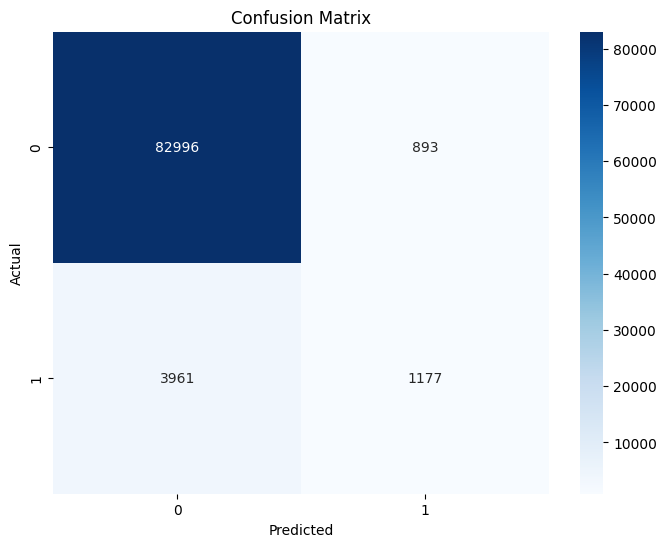


Accuracy: 0.9454772147775394

Confusion Matrix:
[[82996   893]
 [ 3961  1177]]


In [7]:
# Make predictions
y_pred = model.predict(X_test)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Additional metrics
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(cm)

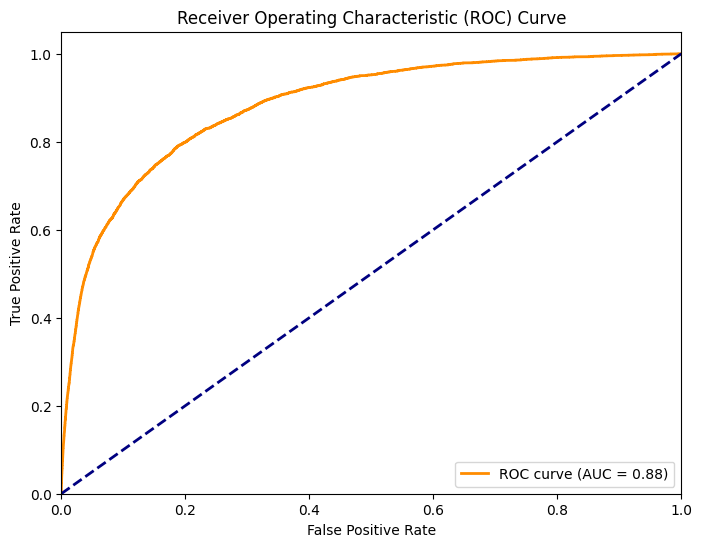

Area Under the Curve (AUC): 0.8825
Encoding:
No: 0
Yes: 1


In [8]:
# Encode the target variable
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)

# Get prediction probabilities
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_proba, pos_label=1)

# Calculate Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Print AUC score
print(f"Area Under the Curve (AUC): {roc_auc:.4f}")

# Print the encoding
print("Encoding:")
for cls in le.classes_:
    print(f"{cls}: {le.transform([cls])[0]}")
    

Prediction

In [9]:
from enum import Enum
class Feature(Enum):
    BMI = 0
    PhysicalHealthDays = 1
    MentalHealthDays = 2
    SleepHours = 3
    SmokerStatus = 4
    AlcoholDrinkers = 5
    HadStroke = 6
    DifficultyWalking = 7
    Sex = 8
    PhysicalActivities = 9
    HadAsthma = 10
    HadKidneyDisease = 11
    HadSkinCancer = 12
    AgeCategory = 13
    HadDiabetes = 14
    GeneralHealth = 15



# Define features and target
numeric_features = ['BMI', 'PhysicalHealthDays', 'MentalHealthDays', 'SleepHours']
categorical_features = ['SmokerStatus', 'AlcoholDrinkers', 'HadStroke', 'DifficultyWalking', 'Sex', 'PhysicalActivities', 'HadAsthma', 'HadKidneyDisease', 'HadSkinCancer', 'AgeCategory', 'HadDiabetes', 'GeneralHealth']
target = 'HadHeartAttack'

# Split the data
X = df[numeric_features + categorical_features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), categorical_features)
    ])

# Create and train your model pipeline
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Fit the model
model_pipeline.fit(X_train, y_train)

def getPrediction(input_data):
    data_df = pd.DataFrame([input_data])
    return round(model_pipeline.predict_proba(data_df)[0][1] * 100, 2)

def testPrediction(input_data):
    for key, value in input_data.items():
        print(f"{key}: {value}")

    prediction = getPrediction(input_data)
    print(f"The probability of {input_data['Name']} developing heart disease is {prediction}%")

# Example usage
low_risk_patient = {
    'Name': 'Low Risk Patient',
    'BMI': 28.5,
    'PhysicalHealthDays': 3,
    'MentalHealthDays': 2,
    'SleepHours': 7,
    'SmokerStatus': 'Never smoked',
    'AlcoholDrinkers': 'No',
    'HadStroke': 'No',
    'DifficultyWalking': 'No',
    'Sex': 'Male',
    'PhysicalActivities': 'Yes',
    'HadAsthma': 'No',
    'HadKidneyDisease': 'No',
    'HadSkinCancer': 'No',
    'AgeCategory': '65-69',
    'HadDiabetes': 'No',
    'GeneralHealth': 'Very good'
}

high_risk_patient = {
    'Name': 'High Risk Patient',
    'BMI': 42.5,
    'PhysicalHealthDays': 30,
    'MentalHealthDays': 30,
    'SleepHours': 2,
    'SmokerStatus': 'Current smoker',
    'AlcoholDrinkers': 'Yes',
    'HadStroke': 'Yes',
    'DifficultyWalking': 'Yes',
    'Sex': 'Male', 
    'PhysicalActivities': 'No',
    'HadAsthma': 'Yes',
    'HadKidneyDisease': 'Yes',
    'HadSkinCancer': 'No',
    'AgeCategory': '75-79',
    'HadDiabetes': 'Yes',
    'GeneralHealth': 'Poor'
}

testPrediction(low_risk_patient)
print("\n")
testPrediction(high_risk_patient)

Name: Low Risk Patient
BMI: 28.5
PhysicalHealthDays: 3
MentalHealthDays: 2
SleepHours: 7
SmokerStatus: Never smoked
AlcoholDrinkers: No
HadStroke: No
DifficultyWalking: No
Sex: Male
PhysicalActivities: Yes
HadAsthma: No
HadKidneyDisease: No
HadSkinCancer: No
AgeCategory: 65-69
HadDiabetes: No
GeneralHealth: Very good
The probability of Low Risk Patient developing heart disease is 0.53%


Name: High Risk Patient
BMI: 42.5
PhysicalHealthDays: 30
MentalHealthDays: 30
SleepHours: 2
SmokerStatus: Current smoker
AlcoholDrinkers: Yes
HadStroke: Yes
DifficultyWalking: Yes
Sex: Male
PhysicalActivities: No
HadAsthma: Yes
HadKidneyDisease: Yes
HadSkinCancer: No
AgeCategory: 75-79
HadDiabetes: Yes
GeneralHealth: Poor
The probability of High Risk Patient developing heart disease is 31.62%
